# Bay Wheels Ride Data Exploration & Visualization
## by (Muhammad Ahmad Raza)

## Introduction
> [Bay Wheels](https://www.lyft.com/bikes/bay-wheels) is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. **Source** [wikipedia](https://en.wikipedia.org/wiki/Bay_Wheels)

## Preliminary Wrangling


In [11]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import os
import glob
import zipfile

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [69]:
# Extract csv files from zip files and move into new folder called unzip
files = glob.glob(os.path.join('data', '2018*.csv.zip'))
for file in files:
    with zipfile.ZipFile(file, 'r') as zipObj:
        print("-------------------")
        print(file)
        listOfFileNames = zipObj.namelist()
        for fileName in listOfFileNames:
           # Check filename endswith csv
           if fileName.endswith('.csv'):
               # Extract a single file from zip
                print(fileName)
                zipObj.extract(fileName, 'unzip')


['data/201807-fordgobike-tripdata.csv.zip', 'data/201804-fordgobike-tripdata.csv.zip', 'data/201803-fordgobike-tripdata.csv.zip', 'data/201811-fordgobike-tripdata.csv.zip', 'data/201808-fordgobike-tripdata.csv.zip', 'data/201805-fordgobike-tripdata.csv.zip', 'data/201809-fordgobike-tripdata.csv.zip', 'data/201810-fordgobike-tripdata.csv.zip', 'data/201802-fordgobike-tripdata.csv.zip', 'data/201801-fordgobike-tripdata.csv.zip', 'data/201812-fordgobike-tripdata.csv.zip', 'data/201806-fordgobike-tripdata.csv.zip']
-------------------
data/201807-fordgobike-tripdata.csv.zip
201807-fordgobike-tripdata.csv
-------------------
data/201804-fordgobike-tripdata.csv.zip
201804-fordgobike-tripdata.csv
-------------------
data/201803-fordgobike-tripdata.csv.zip
201803-fordgobike-tripdata.csv
-------------------
data/201811-fordgobike-tripdata.csv.zip
201811-fordgobike-tripdata.csv
-------------------
data/201808-fordgobike-tripdata.csv.zip
201808-fordgobike-tripdata.csv
-------------------
data/201

In [72]:
# Read files from Unziped data Folder now.
folder_name = 'unzip'
print("path is {0}", os.path.join(folder_name, '*.csv'))
dataframes = [pd.read_csv(file) for file in glob.glob(os.path.join(folder_name, '*.csv'))]
df = pd.concat(dataframes, ignore_index=True)
print(df.shape)
df.sample(5)

path is {0} unzip/*.csv
(1863721, 14)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
1055225,1741,2018-12-04 07:58:46.1080,2018-12-04 08:27:48.0100,19.0,Post St at Kearny St,37.788975,-122.403452,104.0,4th St at 16th St,37.767045,-122.390833,3355,Subscriber,No
1820075,538,2018-04-11 17:55:02.5070,2018-04-11 18:04:00.6990,187.0,Jack London Square,37.796248,-122.279352,183.0,Telegraph Ave at 19th St,37.808702,-122.269927,1585,Subscriber,No
1304877,1649,2018-08-08 18:31:23.5280,2018-08-08 18:58:53.3270,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,39.0,Scott St at Golden Gate Ave,37.778999,-122.436861,2645,Customer,No
659775,686,2018-03-23 07:41:51.5280,2018-03-23 07:53:18.1890,56.0,Koshland Park,37.773414,-122.427317,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3133,Subscriber,No
1536456,1104,2018-07-31 16:06:20.4670,2018-07-31 16:24:45.4300,102.0,Irwin St at 8th St,37.766883,-122.399579,223.0,16th St Mission BART Station 2,37.764765,-122.420091,1221,Subscriber,Yes


In [133]:
# Save Data into new csv for further use.
df.to_csv('2018-fordgobike-tripdata.csv', index=False)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


### Assess Data

In [75]:
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

In [76]:
df.duplicated().sum()

0

In [78]:
df.user_type.value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

In [79]:
df.bike_share_for_all_trip.value_counts()

No     1701386
Yes     162335
Name: bike_share_for_all_trip, dtype: int64

#### Observation from Assessment of Data:
- start_time and endtime must be datetime objects.
- start_station_id and end_station_id must be string obects.
- start_station_id and end_station_id are ending with extra .0
- DataType for user_type and bike_share_for_all_trip should be Category.

### Cleaning Data

In [80]:
# Create a new copy from the data for cleaning.
df_clean = df.copy()

In [84]:
# Convert inaccurate datatypes to accurate one, mentioned above.
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

df_clean['start_station_id'] = df_clean['start_station_id'].astype('str')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('str')
df_clean['bike_id'] = df_clean['bike_id'].astype('str')

df_clean['user_type'] = df_clean['user_type'].astype('category')

df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1863721 non-null  int64         
 1   start_time               1863721 non-null  datetime64[ns]
 2   end_time                 1863721 non-null  datetime64[ns]
 3   start_station_id         1863719 non-null  object        
 4   start_station_name       1851950 non-null  object        
 5   start_station_latitude   1863721 non-null  float64       
 6   start_station_longitude  1863721 non-null  float64       
 7   end_station_id           1863719 non-null  object        
 8   end_station_name         1851950 non-null  object        
 9   end_station_latitude     1863721 non-null  float64       
 10  end_station_longitude    1863721 non-null  float64       
 11  bike_id                  1863721 non-null  object        
 12  

In [85]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes


In [89]:
df_clean['start_station_id'] = df['start_station_id'].map(lambda x: str(x)[:-2])
df_clean['end_station_id'] =  df['end_station_id'].map(lambda x: str(x)[:-2])

In [90]:
df_clean['start_station_id'].head()

0    284
1      6
2     93
3     93
4    308
Name: start_station_id, dtype: object

In [91]:
df_clean['end_station_id'].head()

0    114
1    324
2     15
3     15
4    297
Name: end_station_id, dtype: object

In [92]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  object        
dtypes: category(1), datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 186.6+ MB


In [93]:
df_clean.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
1297328,828,2018-08-09 18:52:57.852,2018-08-09 19:06:46.408,22,Howard St at Beale St,37.789756,-122.394643,104,4th St at 16th St,37.767045,-122.390833,2816,Subscriber,No
146981,495,2018-09-24 19:04:05.103,2018-09-24 19:12:20.734,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,292,Subscriber,No
1310612,593,2018-08-08 07:39:09.316,2018-08-08 07:49:02.466,28,The Embarcadero at Bryant St,37.787168,-122.388098,6,The Embarcadero at Sansome St,37.804770,-122.403234,2633,Subscriber,No
107359,455,2018-09-30 19:02:12.130,2018-09-30 19:09:47.954,95,Sanchez St at 15th St,37.766219,-122.431060,59,S Van Ness Ave at Market St,37.774814,-122.418954,3619,Subscriber,No
340999,529,2018-11-16 08:38:59.616,2018-11-16 08:47:48.774,120,Mission Dolores Park,37.761420,-122.426435,141,Valencia St at Cesar Chavez St,37.747998,-122.420219,3325,Subscriber,No
1318968,1017,2018-08-06 19:56:03.714,2018-08-06 20:13:01.362,180,Telegraph Ave at 23rd St,37.812678,-122.268773,233,E 12th St at 4th Ave,37.795812,-122.255555,3316,Customer,No
669787,570,2018-03-20 09:31:14.179,2018-03-20 09:40:45.093,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,22,Howard St at Beale St,37.789756,-122.394643,3146,Subscriber,No
1819083,878,2018-04-12 07:42:18.557,2018-04-12 07:56:57.258,74,Laguna St at Hayes St,37.776435,-122.426244,102,Irwin St at 8th St,37.766883,-122.399579,720,Subscriber,No
1003884,1307,2018-12-14 06:22:58.982,2018-12-14 06:44:46.540,16,Steuart St at Market St,37.794130,-122.394430,16,Steuart St at Market St,37.794130,-122.394430,2779,Customer,No
160907,48425,2018-09-21 17:53:39.887,2018-09-22 07:20:45.659,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,50,2nd St at Townsend St,37.780526,-122.390288,1012,Customer,No


In [94]:
# Calculate Some extra column to work with.

# conversion from seconds to minutes.
df_clean['duration_minute'] = df_clean['duration_sec']/60

# Extract only Start Date.
df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')

#Extract hours of a day from date.
df_clean['start_hour_of_day'] = df_clean.start_time.dt.strftime('%H')

# Extract day of the week from start_date.
df_clean['start_day_of_week'] = df_clean.start_time.dt.strftime('%A')

#Extract month from start_date
df_clean['start_month'] = df_clean.start_time.dt.strftime('%B')

# check new columns.
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_minute,start_date,start_hour_of_day,start_day_of_week,start_month
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No,9.966667,2018-02-28,23,Wednesday,February
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6,The Embarcadero at Sansome St,37.804770,-122.403234,324,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No,15.716667,2018-02-28,23,Wednesday,February
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No,309.783333,2018-02-28,18,Wednesday,February
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No,309.300000,2018-02-28,18,Wednesday,February
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308,San Pedro Square,37.336802,-121.894090,297,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes,14.750000,2018-02-28,23,Wednesday,February


**Now, I'll be removing some extra columns which will not use in my analysis process.** which are `duration_sec`, `start_station_id`, `start_station_latitude`, `start_station_longitude`, `end_station_id`, `end_station_latitude`, `end_station_longitude`

In [98]:
columns_to_drop = ['duration_sec', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude']
df_clean.drop(columns_to_drop, axis=1, inplace=True)
df_clean.head()

,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,bike_share_for_all_trip,duration_minute,start_date,start_hour_of_day,start_day_of_week,start_month
0,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,Yerba Buena Center for the Arts (Howard St at ...,Rhode Island St at 17th St,1035,Subscriber,No,9.966667,2018-02-28,23,Wednesday,February
1,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,The Embarcadero at Sansome St,Union Square (Powell St at Post St),1673,Customer,No,15.716667,2018-02-28,23,Wednesday,February
2,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,4th St at Mission Bay Blvd S,San Francisco Ferry Building (Harry Bridges Pl...,3498,Customer,No,309.783333,2018-02-28,18,Wednesday,February
3,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,4th St at Mission Bay Blvd S,San Francisco Ferry Building (Harry Bridges Pl...,3129,Customer,No,309.300000,2018-02-28,18,Wednesday,February
4,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,San Pedro Square,Locust St at Grant St,1839,Subscriber,Yes,14.750000,2018-02-28,23,Wednesday,February


In [97]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  object        
 14  duration_minute          float64       
 15  start_date               object        
 16  start_hour_of_day        object        
 17  start_day_of_week        ob

### What is the structure of your dataset?

> I'm using dataset for the year 2018. The original dataset contains 1863721 ectries and 16 columns. The following columns are: duration_sec, start_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, bike_share_for_all_trip. For the analysis of this Data Set I Added and removed some columns according to my requirements.

> **Columns I removed:** `duration_sec`, `start_station_id`, `start_station_latitude`, `start_station_longitude`, `end_station_id`, `end_station_latitude`, `end_station_longitude`


> **Columns I added:** `duration_minute`, `start_hour_of_day`, `start_day_of_week`, `start_month`

### What is/are the main feature(s) of interest in your dataset?

> The main features are about Rider Type, Stations information, and Ride Duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I'll use serveral features for some calculations and visualizations. i-e
- stations information to calculate most popular stations etc.
- user_type to see what are most riders we had in 2018 who travelled more.
- duration, date time column will help me to visualize time related findings.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [100]:
# Set Base color which I'll be using Throughout the Project.
base_color = sb.color_palette()[0]

Text(0, 0.5, 'Total Riders')

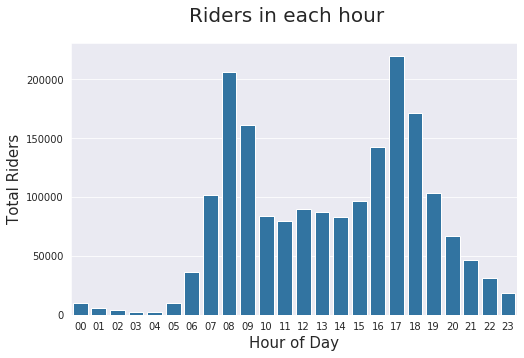

In [113]:
# first, draw trip distribution on day hours to see most busy hours.

plt.figure(figsize=(8,5))

sb.countplot(data=df_clean, x='start_hour_of_day', color=base_color);
plt.suptitle('Riders in each hour', fontsize=20)
plt.xlabel('Hour of Day', fontsize=15)
plt.ylabel('Total Riders', fontsize=15)


It can be seen clearly that 17:00 was the most busy hour as more then 200000 riders travelled in this time on everyday.

In [107]:
df_clean.start_day_of_week.value_counts()

Tuesday      319332
Wednesday    316374
Thursday     314124
Monday       294573
Friday       290390
Saturday     175614
Sunday       153314
Name: start_day_of_week, dtype: int64

Text(0, 0.5, 'Total Riders')

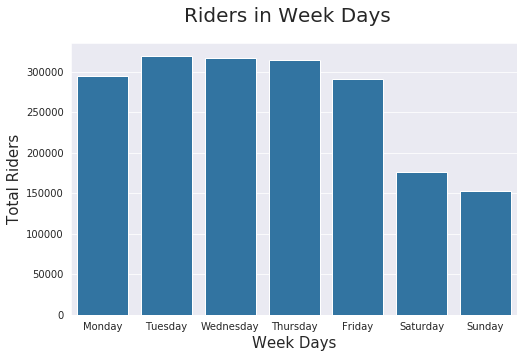

In [114]:
# Second, draw trip distribution week days to see most demanding day of the week.

plt.figure(figsize=(8,5))

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sb.countplot(data=df_clean, x='start_day_of_week', color=base_color, order=days_order);
plt.suptitle('Riders in Week Days', fontsize=20)
plt.xlabel('Week Days', fontsize=15)
plt.ylabel('Total Riders', fontsize=15)

It can be seen that Tuesday, Wednesday and Thursday were days with more riders, more then 300000 riders travelled on these days throughout the year 2018 on these days.

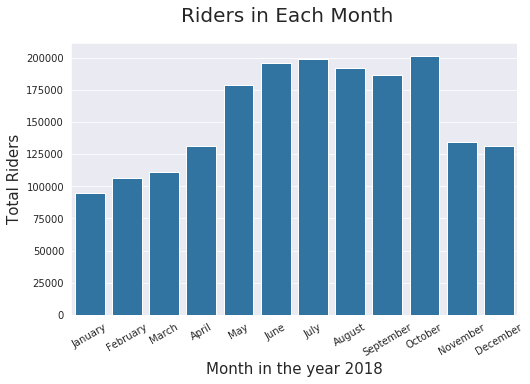

In [117]:
# Second, draw trip distribution week days to see most demanding day of the week.

plt.figure(figsize=(8,5))

order_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sb.countplot(data=df_clean, x='start_month', color=base_color, order=order_month);
plt.suptitle('Riders in Each Month', fontsize=20)
plt.xlabel('Month in the year 2018', fontsize=15)
plt.ylabel('Total Riders', fontsize=15)
plt.xticks(rotation=30);

As visualization above stated that there were more riders from May to October as compare to remaining months. These are more then 175000 in these months.

Text(0, 0.5, 'Total Riders')

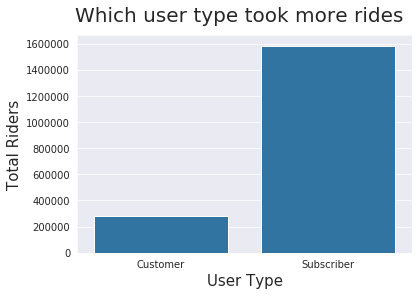

In [120]:
# To See which user categories took more rides in 2018.

sb.countplot(data=df_clean, x='user_type', color=base_color);
plt.suptitle('Which user type took more rides', fontsize=20)
plt.xlabel('User Type', fontsize=15)
plt.ylabel('Total Riders', fontsize=15)

Obviously, the most of riders were those who got subscription before ride. On the other hand very few as compare to subscribers were thoese who were just non subscribers.

Text(0, 0.5, 'Total Riders')

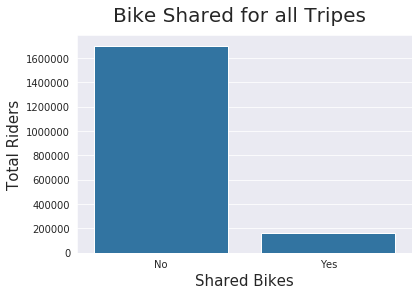

In [122]:

sb.countplot(data=df_clean, x='bike_share_for_all_trip', color=base_color);
plt.suptitle('Bike Shared for all Tripes', fontsize=20)
plt.xlabel('Shared Bikes', fontsize=15)
plt.ylabel('Total Riders', fontsize=15)

Most of the time bike was not shared in the whole trip, as it can be seen that only bellow 200000 riders shared their bikes in the whole year.


Text(0, 0.5, 'Minutes')

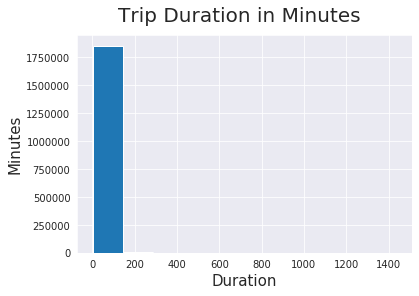

In [125]:
# Let's Draw Trip duration distribution.

plt.hist(data=df_clean, x='duration_minute');
plt.suptitle('Trip Duration in Minutes', fontsize=20)
plt.xlabel('Duration', fontsize=15)
plt.ylabel('Minutes', fontsize=15)

All of the rider's took trip for less then 200 minutes. let's zoom the figure and redraw this figure to have more clearity.

In [126]:
df_clean['duration_minute'].describe(percentiles=[.99])

count    1.863721e+06
mean     1.428838e+01
std      3.950631e+01
min      1.016667e+00
50%      9.266667e+00
99%      9.221667e+01
max      1.439433e+03
Name: duration_minute, dtype: float64

Text(0, 0.5, 'Minutes')

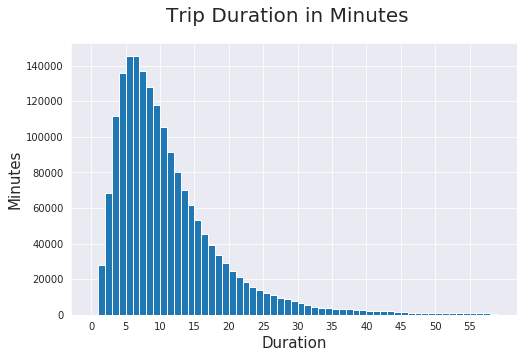

In [130]:
plt.figure(figsize=(8,5))
bin_size = np.arange(0, 60, 1)
ticks = np.arange(0, 60, 5)
plt.hist(data=df_clean, x='duration_minute', bins=bin_size);
plt.xticks(ticks, ticks);
plt.suptitle('Trip Duration in Minutes', fontsize=20)
plt.xlabel('Duration', fontsize=15)
plt.ylabel('Minutes', fontsize=15)

It can bee seen most of the trips were shorder then 1hr. let's remove outliers to have a better picture.

In [131]:
df_clean = df_clean.query('duration_minute <= 66')
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1835478 entries, 0 to 1863720
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   start_time               1835478 non-null  datetime64[ns]
 1   end_time                 1835478 non-null  datetime64[ns]
 2   start_station_name       1824136 non-null  object        
 3   end_station_name         1824136 non-null  object        
 4   bike_id                  1835478 non-null  object        
 5   user_type                1835478 non-null  category      
 6   bike_share_for_all_trip  1835478 non-null  object        
 7   duration_minute          1835478 non-null  float64       
 8   start_date               1835478 non-null  object        
 9   start_hour_of_day        1835478 non-null  object        
 10  start_day_of_week        1835478 non-null  object        
 11  start_month              1835478 non-null  object        
dtype

In [132]:
# Now time to save Clearned data into a separate File.

df_clean.to_csv('fordgobike_trips_2018_clean.csv', index=False)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 
- It can be seen clearly that 17:00 was the most busy hour as more then 200000 riders travelled in this time on everyday.
- It can be seen that Tuesday, Wednesday and Thursday were days with more riders, more then 300000 riders travelled on these days throughout the year 2018 on these days.
- As visualization above stated that there were more riders from May to October as compare to remaining months. 
- These are more then 175000 in these months. Obviously, the most of riders were those who got subscription before ride. On the other hand very few as compare to subscribers were thoese who were just non subscribers. 
- Most of the time bike was not shared in the whole trip, as it can be seen that only bellow 200000 riders shared their bikes in the whole year. 
- It can bee seen most of the trips were shorder then 1hr.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When I draw trip duration's distribution I saw all rider's were in the same bin under 200 minutes. Then I have to zoom it and redraw the distribution for the more clearity of data. To figure it out, I filtered out records from outliers and use .query() method to get get specipic records for Trip Duration.


## Bivariate Exploration

**Relationship or the distribution varies between customers and suhbscribers.**

Text(0, 0.5, 'Minutes')

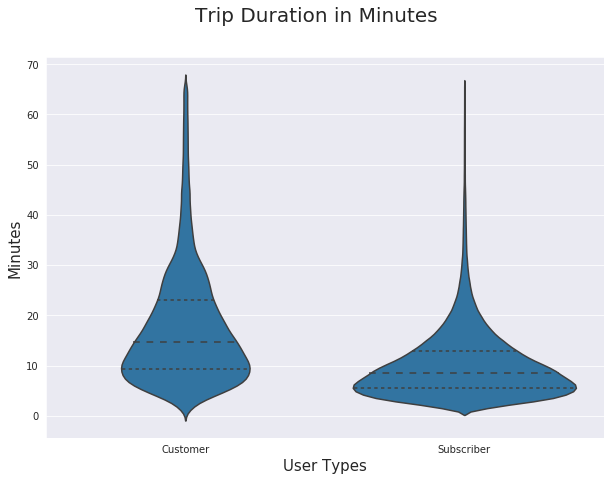

In [136]:
plt.figure(figsize=(10,7))
sb.violinplot(data=df_clean, x='user_type', y='duration_minute', color=base_color, inner='quartile');
plt.suptitle('Trip Duration in Minutes', fontsize=20)
plt.xlabel('User Types', fontsize=15)
plt.ylabel('Minutes', fontsize=15)

The Distribution stated that there are more subscribers than Customers. And it can be seen very clearly.

**Now lets see, Average Duration of Trips on Week Days**

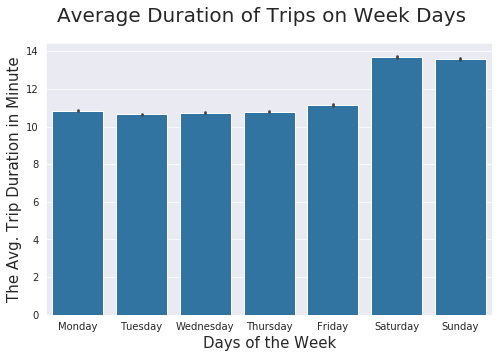

In [140]:
plt.figure(figsize=(8,5))
sb.barplot(data=df_clean, x='start_day_of_week', y='duration_minute', color=base_color, order=days_order);
plt.suptitle('Average Duration of Trips on Week Days', fontsize=20)
plt.xlabel('Days of the Week', fontsize=15);
plt.ylabel('The Avg. Trip Duration in Minute', fontsize=15);

The Trip durations were longer on weekends than week days. People had long minutes on saturday and sunday.

**Now, let's have look towards Weekly usage between customers and subscribers**

Text(0.5, 0, 'Days of the Week')

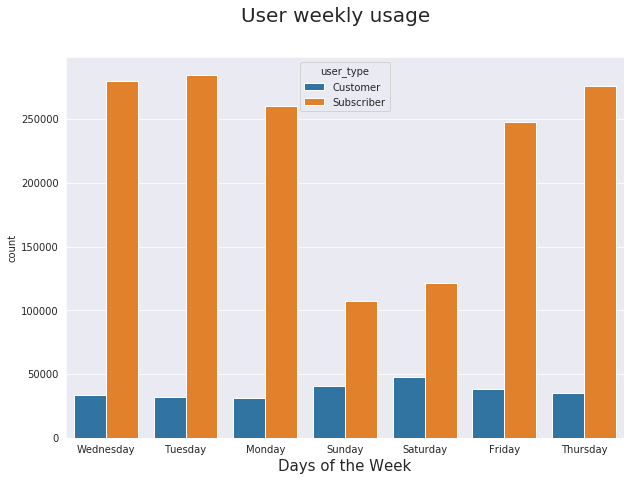

In [159]:
plt.figure(figsize=(10,7))
sb.countplot(data=df_clean, x='start_day_of_week', hue='user_type');
plt.suptitle('User weekly usage', fontsize=20)
plt.xlabel('Days of the Week', fontsize=15)

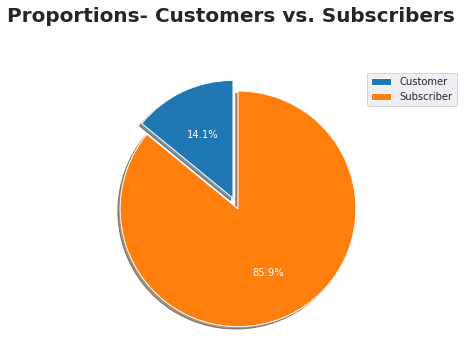

In [156]:
# let's create Proportion first.

customer_prop = df_clean[df_clean.user_type == "Customer"]['bike_id'].count() / df_clean['bike_id'].count()
subscriber_prop =  df_clean[df_clean.user_type == "Subscriber"]['bike_id'].count() / df_clean['bike_id'].count()

labels = ['Customer', 'Subscriber']
plt.figure(figsize = [8, 5])

size = [customer_prop, subscriber_prop]
explode = (0, 0.1)

plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':'white'})
plt.legend(labels, loc="best")
plt.axis('equal')

plt.suptitle('Proportions- Customers vs. Subscribers', y=1.05, df['start_station_name'].value_counts()=20, fontweight='bold');

In the Above Pie Chart, It can cearly see that more then 85% are Subscribers who took rides.

In [157]:
df_clean.head()

,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,bike_share_for_all_trip,duration_minute,start_date,start_hour_of_day,start_day_of_week,start_month
0,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,Yerba Buena Center for the Arts (Howard St at ...,Rhode Island St at 17th St,1035,Subscriber,No,9.966667,2018-02-28,23,Wednesday,February
1,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,The Embarcadero at Sansome St,Union Square (Powell St at Post St),1673,Customer,No,15.716667,2018-02-28,23,Wednesday,February
4,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,San Pedro Square,Locust St at Grant St,1839,Subscriber,Yes,14.750000,2018-02-28,23,Wednesday,February
5,2018-02-28 23:14:19.170,2018-02-28 23:29:40.437,San Jose Diridon Station,Mission St at 1st St,2656,Customer,No,15.350000,2018-02-28,23,Wednesday,February
6,2018-02-28 23:21:49.274,2018-02-28 23:26:27.222,San Salvador St at 1st St,San Fernando St at 4th St,1616,Subscriber,No,4.616667,2018-02-28,23,Wednesday,February


**Now, let's have look towards The Most Popular Station Where Rider's Took more rides.**

In [194]:
df_clean['start_station_name'].value_counts().tail(10).index.tolist()

['Laguna St at McAllister St',
 'Masonic Ave at Turk St',
 'Williams Ave at Apollo St',
 'Willow St at Vine St',
 'Lane St at Van Dyke Ave',
 'William St at 4th St (Temporary Location)',
 'Williams Ave at 3rd St',
 'Viva Calle SJ',
 'Farnam St at Fruitvale Ave',
 '2nd St at S Park St']

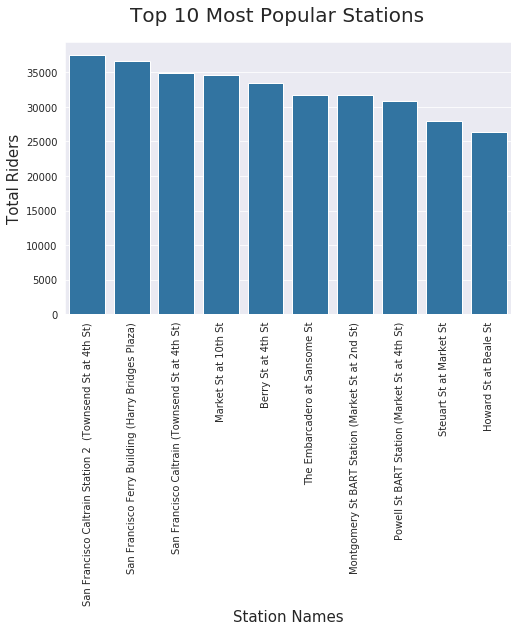

In [185]:
top_used_cities = df_clean['start_station_name'].value_counts().head(10).index.tolist()
plt.figure(figsize=(8,5))

sb.countplot(data=df_clean, x='start_station_name', color=base_color, order=top_used_cities)
plt.suptitle('Top 10 Most Popular Stations ', fontsize=20)
plt.xlabel('Station Names', fontsize=15)
plt.ylabel('Total Riders', fontsize=15)
plt.xticks(rotation=90);

**Draw Top 10 least used Station from where very less riders took rides**

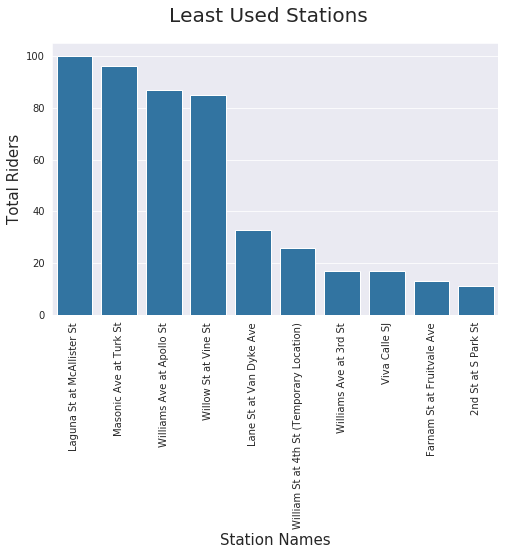

In [192]:
top_used_cities = df_clean['start_station_name'].value_counts().tail(10).index.tolist()
plt.figure(figsize=(8,5))
sb.countplot(data=df_clean, x='start_station_name', color=base_color, order=top_used_cities)
plt.suptitle('Least Used Stations', fontsize=20)
plt.xlabel('Station Names', fontsize=15)
plt.ylabel('Total Riders', fontsize=15)
plt.xticks(rotation=90);

There are still Some Stations that can be seen in the above graph where the number of riders were very low like bellow 100.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Firstly, The Number of Subscribers are more then number of customers. About 80% users are those who had subsucription from comapny.
- There were more long duration trips on weekedns then Week days.
- The number of riders are more in weekdays then weedays.
- San Francisco Caltrain Station 2  (Townsend St at 4th St) is the most popular station where most of the riders took rides.
- 2nd St at S Park St is the least popular station and very few riders use this service in this area. It is observed that less then 20 riders only start their journy from this station in 2018



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It's an interesting fact that the Subscribed users are more older than Customers. And the October was the month when more riders took rides in the year 2018.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [196]:
df_clean.head()

,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,bike_share_for_all_trip,duration_minute,start_date,start_hour_of_day,start_day_of_week,start_month
0,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,Yerba Buena Center for the Arts (Howard St at ...,Rhode Island St at 17th St,1035,Subscriber,No,9.966667,2018-02-28,23,Wednesday,February
1,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,The Embarcadero at Sansome St,Union Square (Powell St at Post St),1673,Customer,No,15.716667,2018-02-28,23,Wednesday,February
4,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,San Pedro Square,Locust St at Grant St,1839,Subscriber,Yes,14.750000,2018-02-28,23,Wednesday,February
5,2018-02-28 23:14:19.170,2018-02-28 23:29:40.437,San Jose Diridon Station,Mission St at 1st St,2656,Customer,No,15.350000,2018-02-28,23,Wednesday,February
6,2018-02-28 23:21:49.274,2018-02-28 23:26:27.222,San Salvador St at 1st St,San Fernando St at 4th St,1616,Subscriber,No,4.616667,2018-02-28,23,Wednesday,February


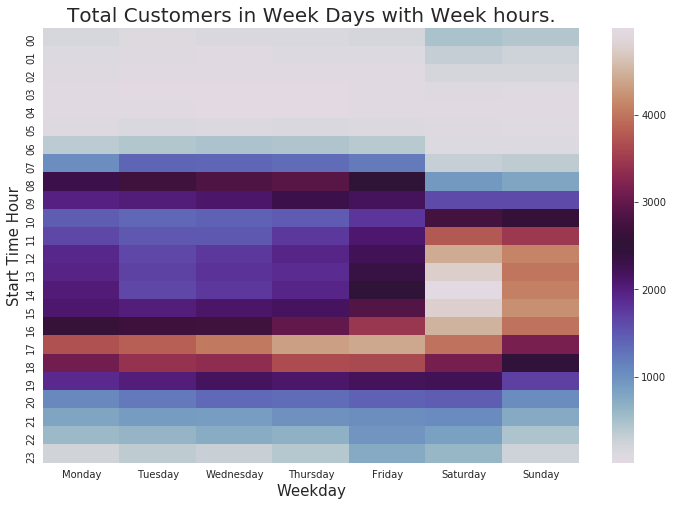

In [214]:
df_clean['start_day_of_week'] = pd.Categorical(df_clean['start_day_of_week'], categories= days_order, ordered=True);

plt.figure(figsize=(12,8))

# Heatmap - Customers

customers = df_clean.query('user_type == "Customer"').groupby(['start_hour_of_day', 'start_day_of_week'])['bike_id'].size().reset_index();
customers = customers.pivot('start_hour_of_day', 'start_day_of_week', 'bike_id')

heat_map = sb.heatmap(customers, cmap = 'twilight')

plt.title('Total Customers in Week Days with Week hours.', y=1.05, fontsize=20)
plt.xlabel('Weekday', fontsize=15)
plt.ylabel('Start Time Hour',  fontsize=15)

plt.show()


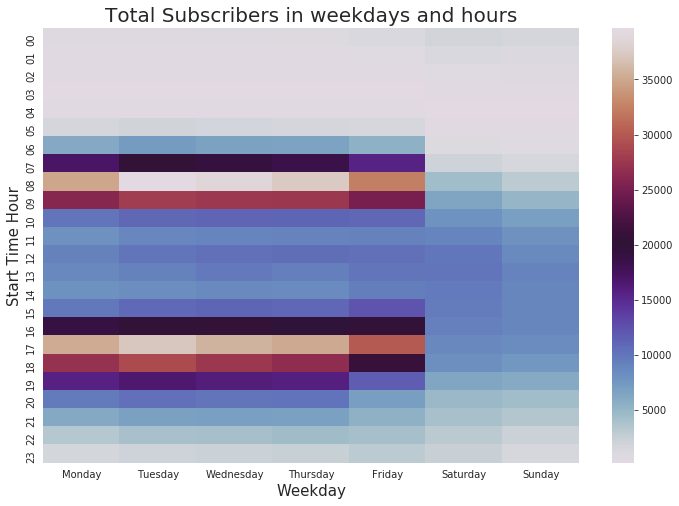

In [215]:

plt.figure(figsize=(12,8))

# Heatmap - Customers

subscribers = df_clean.query('user_type == "Subscriber"').groupby(['start_hour_of_day', 'start_day_of_week'])['bike_id'].size().reset_index();
subscribers = subscribers.pivot('start_hour_of_day', 'start_day_of_week', 'bike_id')

heat_map = sb.heatmap(subscribers, cmap = 'twilight')

plt.title('Total Subscribers in weekdays and hours', y=1.05, fontsize=20)
plt.xlabel('Weekday', fontsize=15)
plt.ylabel('Start Time Hour',  fontsize=15)

plt.show()


The Above draw two different heatmaps 1 for customers and others for Subscribers which shews usage pattren for two different rider types. It can be seen clearly that Subscribers heavily use rides on Weekdays whereas the Customers mostly use rides on Weekends. 
If we talk about timing which are most popular in both categories, we can say that Subscribers mostly use it to commute to office in the morning and in the evening 7:00 -9:00 and 16:00 -18:00 respectively. Whereas, use 10:00 to 17:00 on weekend respectively.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> The Above draw two different heatmaps 1 for customers and others for Subscribers which shews usage pattren for two different rider types. It can be seen clearly that Subscribers heavily use rides on Weekdays whereas the Customers mostly use rides on Weekends. If we talk about timing which are most popular in both categories, we can say that Subscribers mostly use it to commute to office in the morning and in the evening 7:00 -9:00 and 16:00 -18:00 respectively. Whereas, use 10:00 to 17:00 on weekend respectively.

### Were there any interesting or surprising interactions between features?

>  Trip Duration was only surprising throughout the dataset. Becouse all duration were in a single bin when I initially draw them. Then I've to zoom them to see the clear picure of ride duration.